### Общий пайплайн работы на примере линейной регрессии

#### Рассмотрим датасет

In [1]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [2]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
diabetes['data'].shape

(442, 10)

In [4]:
X = diabetes['data']

In [5]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
diabetes['target'].shape

(442,)

In [7]:
y = diabetes['target']

#### Обучение на всем датасете

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = model.predict(X)

In [11]:
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, y_pred)

2859.6903987680657

In [13]:
import math
math.sqrt(mean_squared_error(y, y_pred))

53.47607314274362

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(y, y_pred)

0.5177494254132934

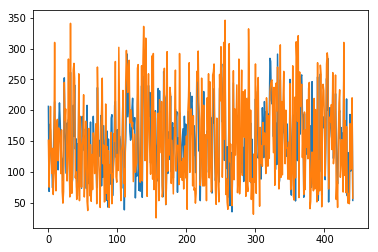

In [16]:
import matplotlib.pyplot as plt
x_ticks = range(len(y_pred))
plt.plot(x_ticks, y_pred, x_ticks, y)
plt.show()

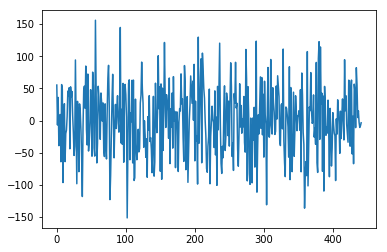

In [17]:
plt.plot(x_ticks, y_pred-y)

#### Разобьем на train/test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.shape

(296, 10)

In [22]:
y_train.shape

(296,)

In [23]:
X_test.shape

(146, 10)

In [24]:
y_test.shape

(146,)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
mean_squared_error(y_test, y_pred)

2817.8015701686772

#### Добавим регуляризацию

В LinearRegression внезапно нет таких параметров - дело в том что она на самом деле просто решает задачу аналитически. Лучше использовать SGDRegressor!

In [27]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(penalty='l1', alpha=0.05, max_iter=10000)

In [28]:
model.fit(X_train, y_train)

SGDRegressor(alpha=0.05, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [29]:
model.coef_

array([  18.32881468, -163.64107377,  512.14837073,  349.08212296,
        -44.71967441,  -80.1847962 , -223.57287005,  100.76219659,
        325.29565393,   51.01044914])

In [30]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2786.450463853526

Что происходит с коэффициентами при увелиении alpha и выборе l1/l2?

In [31]:
for alpha in [0, 0.01, 0.1, 0.5, 1, 5]:
    model = SGDRegressor(penalty='l2', alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    print(f"For alpha: {alpha} coefficients:\n{model.coef_}\n")

For alpha: 0 coefficients:
[  39.00212145 -195.19056979  519.28775615  362.46890935  -72.66198036
 -104.32067536 -231.56478803  127.52752224  335.36770629   63.11138121]

For alpha: 0.01 coefficients:
[ 29.91602206 -15.82262795 144.70383728 107.05476726  16.5956083
   7.75623078 -84.20354549  74.78439825 112.03990716  63.14719628]

For alpha: 0.1 coefficients:
[  5.66986317   0.22615339  20.795076    15.74183383   5.42287447
   4.33354206 -13.33238591  13.66574922  17.56536402  11.46086963]

For alpha: 0.5 coefficients:
[ 1.22445426  0.11618517  4.34684977  3.30171339  1.2239224   1.00163133
 -2.82100167  2.9411825   3.71606899  2.45991557]

For alpha: 1 coefficients:
[ 0.61729739  0.06363307  2.18768352  1.66066611  0.62039864  0.50941009
 -1.42197441  1.48502957  1.87066686  1.24072862]

For alpha: 5 coefficients:
[ 0.12758053  0.01001593  0.43444999  0.33279812  0.12393817  0.10061846
 -0.28381371  0.29640895  0.37526991  0.2484664 ]



In [32]:
for alpha in [0, 0.01, 0.1, 0.5, 1, 5]:
    model = SGDRegressor(penalty='l1', alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    print(f"For alpha: {alpha} coefficients:\n{model.coef_}\n")

For alpha: 0 coefficients:
[  38.98265509 -195.1558432   519.31102913  362.47402549  -72.68488353
 -104.23602526 -231.58679858  127.40726668  335.44792011   63.06857324]

For alpha: 0.01 coefficients:
[  34.88906979 -188.86833882  517.88155148  359.79902764  -67.17106442
  -99.50020765 -230.03697115  122.10490757  333.39645066   60.7430496 ]

For alpha: 0.1 coefficients:
[   0.         -132.35488001  504.50919214  335.30873021  -14.97515839
  -54.54426177 -214.26336552   74.11704877  314.85311829   38.51874254]

For alpha: 0.5 coefficients:
[   0.            0.          447.53585934  231.19831869    0.
    0.         -111.28944       5.3074668   264.83992851    0.        ]

For alpha: 1 coefficients:
[  0.           0.         361.48461408 104.5699306    0.
   0.           0.           0.         186.37756184   0.        ]

For alpha: 5 coefficients:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



L1 стремится сделать коэффициенты нулевыми!

#### Подбор параметров

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {'penalty': ['l1', 'l2'], 'alpha': [0.01, 0.1, 0.5, 1], 'max_iter': [1000, 5000, 10000]}

In [35]:
model = SGDRegressor()

In [36]:
gs_model = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [37]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': [0.01, 0.1, 0.5, 1], 'max_iter': [1000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [38]:
gs_model.best_params_

{'alpha': 0.01, 'max_iter': 10000, 'penalty': 'l1'}

In [39]:
gs_model.best_estimator_

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [40]:
gs_model.best_score_

-3189.9057316162584

#### Метрика на кросс-валидации

In [41]:
model = SGDRegressor(alpha=0.01, max_iter=10000, penalty='l1')

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

In [43]:
scores

array([-2895.08455897, -3020.53194503, -3148.54901677, -2930.12703375,
       -2990.92575875])